In [1]:
#Import Dependencies

import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
#from scipy.stats import linregress
from matplotlib.pyplot import figure
import os

In [2]:
# Save file path to variable
dropout_csv = "Modified_data.csv"
# Read with Pandas
dropout_df = pd.read_csv(dropout_csv)
dropout_df.head()

,Year,Sex,Ethnicity,Percentage,Count (000s)
0,2000,NaN,NaN,23.5,6234.0
1,2001,NaN,NaN,23.8,6386.0
2,2002,NaN,NaN,23.7,6475.0
3,2003,NaN,NaN,22.7,6230.0
4,2004,NaN,NaN,22.1,6160.0


In [3]:
#Bring in 2015 data
# Save file path to variable
SY2015_csv = "SY2015_data.csv"
# Read with Pandas
SY2015_df = pd.read_csv(SY2015_csv)
SY2015_df.head()

,Year,Sex,Ethnicity,Percentage,Count (000s)
0,2015,NaN,NaN,16.9,5077.0
1,2015,Male,NaN,17.7,2682.0
2,2015,Female,NaN,16.0,2395.0
3,2015,NaN,White,14.2,2340.0
4,2015,NaN,Black,18.6,806.0


In [4]:
#2015 TOTAL COUNTS = 5,077
#Clear out summary data
SY2015_dfc = SY2015_df.dropna()
SY2015_dfc.head()

,Year,Sex,Ethnicity,Percentage,Count (000s)
10,2015,Male,White,14.8,1244.0
11,2015,Male,Black,19.3,404.0
12,2015,Male,Hispanic,25.1,832.0
13,2015,Male,Asian,9.5,79.0
15,2015,Male,American Indian,26.7,39.0


In [5]:
#Temp = SY2015_dfc
# Temp = Temp.set_index('Year')     TO DO:  SAVE THESE OUT SEPERATELY LATER
# Temp.T

In [6]:
#Group dropout data by gender
SY2015_gender = SY2015_dfc.groupby("Sex")
SY2015_gender.sum()

,Year,Percentage,Count (000s)
Sex,,,
Female,10075,81.4,2355.0
Male,12090,117.8,2673.0


In [7]:
#Validate
2355 + 2673

5028

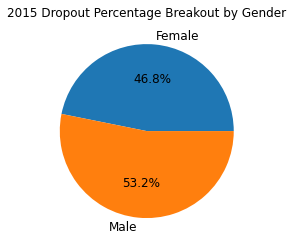

In [8]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
genders = ["Female", "Male"]
gcounts = [2355, 2673]

plt.title("2015 Dropout Percentage Breakout by Gender")
plt.pie(gcounts, labels=genders, textprops={'size': 'larger'}, autopct="%1.1f%%")
plt.savefig("Gender.png", format="png")

In [9]:
#Group dropout data by ethnicity
SY2015_ethnic = SY2015_dfc.groupby("Ethnicity")
SY2015_ethnic.sum()

,Year,Percentage,Count (000s)
Ethnicity,,,
American Indian,2015,26.7,39.0
Asian,4030,19.1,156.0
Black,4030,37.2,807.0
Hispanic,4030,47.4,1541.0
Two or more races,4030,40.5,146.0
White,4030,28.3,2339.0


In [10]:
#Validate
39+156+807+1541+146+2339

5028

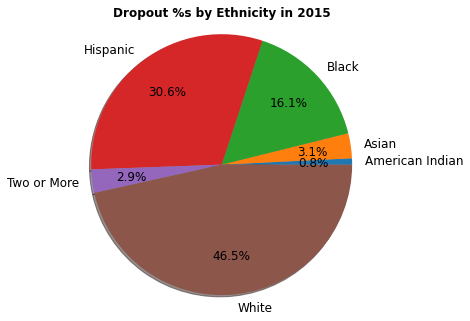

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a pie plot showing the distribution of dropout counts by ethnicity
ethnicities = "American Indian", "Asian", "Black", "Hispanic", "Two or More", "White"
ecounts = [39, 156, 807, 1541, 146, 2339]
fig1, ax1 = plt.subplots()
ax1.pie(ecounts, labels=ethnicities, radius = 1.5, textprops={'size': 'larger'}, pctdistance=0.7, autopct='%1.1f%%', shadow=True)
ax1.set_title("Dropout %s by Ethnicity in 2015", y = 1.2, fontdict={'fontsize': 'large', 'verticalalignment': 'top', 'fontweight': 600})
plt.show()
plt.savefig("Ethnicity.png", format="png")

In [12]:
#NEXT STEPS - LINE GRAPHS SHOWING ETHNICITY RATES OVER TIME
#Bring in data
# Save file path to variable
EthbyYr_csv = "EthnbyYear.csv"
# Read with Pandas
EthbyYr_df = pd.read_csv(EthbyYr_csv)
EthbyYr_df.head()

,Ethnicity,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,White,3144,2984,3148,3002,2983,2926,2879,2997,2740,2737,2758,2793,2691,2371,2295,2340
1,Black,1114,1077,1045,1025,930,995,907,918,944,960,962,995,910,886,818,806
2,Hispanic,1716,2057,2031,1910,1941,1881,1815,1761,1654,1581,1686,1662,1652,1636,1570,1541
3,Asian,193,173,159,142,135,160,178,152,125,132,144,184,184,179,160,157
4,American Indian,68,95,91,53,65,52,43,70,75,51,68,54,55,47,57,63


In [13]:
# Set the 'Ethnicity to be the index
EthbyYr_df = EthbyYr_df.set_index("Ethnicity")
EthbyYr_df

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Ethnicity,,,,,,,,,,,,,,,,
White,3144,2984,3148,3002,2983,2926,2879,2997,2740,2737,2758,2793,2691,2371,2295,2340
Black,1114,1077,1045,1025,930,995,907,918,944,960,962,995,910,886,818,806
Hispanic,1716,2057,2031,1910,1941,1881,1815,1761,1654,1581,1686,1662,1652,1636,1570,1541
Asian,193,173,159,142,135,160,178,152,125,132,144,184,184,179,160,157
American Indian,68,95,91,53,65,52,43,70,75,51,68,54,55,47,57,63
Two or more races,0,0,0,89,92,97,94,92,118,98,88,110,142,109,139,146


In [14]:
#Define years
years = ['2000','2001','2002','2003','2004','2005', '2006','2007','2008','2009','2010','2011','2012','2013','2014','2015']

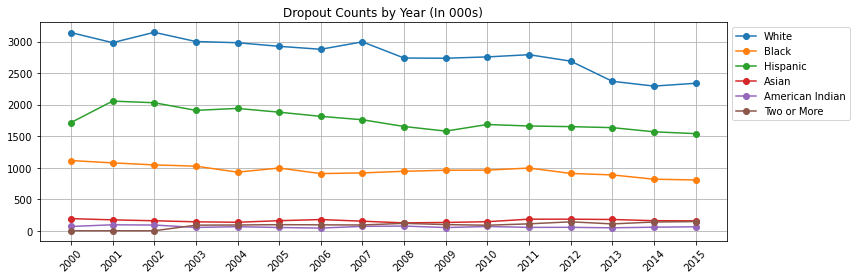

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot the dropout values for various ethnicities
plt.figure(figsize=(12, 4))
White, = plt.plot(years, EthbyYr_df.loc['White',years], label="White", marker="o")
Black, = plt.plot(years, EthbyYr_df.loc['Black',years], label="Black", marker="o")
Hispanic, = plt.plot(years, EthbyYr_df.loc['Hispanic',years], label="Hispanic", marker="o")
Asian, = plt.plot(years, EthbyYr_df.loc['Asian',years], label="Asian", marker="o")
American_Indian, = plt.plot(years, EthbyYr_df.loc['American Indian',years], label="American Indian", marker="o")
TwoMore, = plt.plot(years, EthbyYr_df.loc['Two or more races',years], label="Two or More", marker="o")

# Create a legend for our chart
plt.legend(handles=[White, Black, Hispanic, Asian, American_Indian, TwoMore], loc='upper left', bbox_to_anchor=(1.0, 1.0))
plt.title("Dropout Counts by Year (In 000s)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Show the chart
plt.show()
plt.savefig("Dropout.png", format="png")

In [16]:
#NEXT STEPS
#Using US Census, see if we can do API calls on demographic data BY STATE population, ethnicity, socioeconomic if available

In [17]:
#Import dependencies
import requests
from census import Census

# Census API Key
from config import censapi_key
c = Census(censapi_key, year=2015)
d = Census(censapi_key, year=2013)
e = Census(censapi_key, year=2011)

In [18]:
#2015 Pull
census_data15 = c.acs5.get(("NAME", "B01003_001E",
                          "B02001_002E", "B02001_003E", "B02001_004E", "B02001_005E",
                          "B02001_006E", "B02001_008E", "B03001_003E", "B19301_001E",
                          "B17001_002E",), {'for': 'state:*'})

# Convert to DataFrame
census15_pd = pd.DataFrame(census_data15)

# Column Reordering
census15_pd = census15_pd.rename(columns={"B01003_001E": "Population",
                                          "B02001_002E": "White",
                                          "B02001_003E": 'Black',
                                          "B02001_004E": "American Indian",
                                          "B02001_005E": "Asian",
                                          "B02001_006E": "Pacific Islands",
                                          "B02001_008E": "Two or More",
                                          "B03001_003E": "Hispanic",
                                          "B19301_001E": "Per Capita Income",
                                          "B17001_002E": "Poverty Count",
                                          "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census15_pd["Poverty Rate"] = 100 * \
    census15_pd["Poverty Count"].astype(
        int) / census15_pd["Population"].astype(int)

# Final DataFrame
census15_pd = census15_pd[["State", "Name", "Population", "White", "Black",
                       "American Indian", "Asian", "Pacific Islands", "Two or More", "Hispanic",
                           "Poverty Rate", "Per Capita Income"]]

census15_pd.head()

,State,Name,Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
0,01,Alabama,4830620.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,81646.0,193492.0,18.367415,24091.0
1,02,Alaska,733375.0,484250.0,25022.0,101313.0,42921.0,8841.0,61755.0,47808.0,9.948117,33413.0
2,04,Arizona,6641928.0,5210335.0,281576.0,294721.0,200090.0,12471.0,211845.0,2014711.0,17.776314,25848.0
3,05,Arkansas,2958208.0,2307849.0,459748.0,18409.0,40336.0,6845.0,62537.0,203226.0,18.715520,22798.0
4,06,California,38421464.0,23747013.0,2265387.0,287028.0,5261978.0,150370.0,1734897.0,14750686.0,15.968007,30318.0


In [19]:
#Add populations up correctly
NewPop15 = census15_pd["White"] + census15_pd["Black"] + census15_pd["American Indian"] + census15_pd["Asian"] + census15_pd["Pacific Islands"] + census15_pd["Two or More"] + census15_pd["Hispanic"]
census15_pd["Total Population"] = NewPop15
census15_pd = census15_pd[["State", "Name", "Total Population", "White", "Black", "American Indian", "Asian", "Pacific Islands", "Two or More", "Hispanic", "Poverty Rate", "Per Capita Income"]]
census15_pd = census15_pd.set_index("State")
census15_pd.head()

,Name,Total Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
State,,,,,,,,,,,
01,Alabama,4963034.0,3325464.0,1276544.0,23850.0,59599.0,2439.0,81646.0,193492.0,18.367415,24091.0
02,Alaska,771910.0,484250.0,25022.0,101313.0,42921.0,8841.0,61755.0,47808.0,9.948117,33413.0
04,Arizona,8225749.0,5210335.0,281576.0,294721.0,200090.0,12471.0,211845.0,2014711.0,17.776314,25848.0
05,Arkansas,3098950.0,2307849.0,459748.0,18409.0,40336.0,6845.0,62537.0,203226.0,18.715520,22798.0
06,California,48197359.0,23747013.0,2265387.0,287028.0,5261978.0,150370.0,1734897.0,14750686.0,15.968007,30318.0


In [20]:
#2013 Pull
census_data13 = d.acs5.get(("NAME", "B01003_001E",
                          "B02001_002E", "B02001_003E", "B02001_004E", "B02001_005E",
                          "B02001_006E", "B02001_008E", "B03001_003E", "B19301_001E",
                          "B17001_002E",), {'for': 'state:*'})

# Convert to DataFrame
census13_pd = pd.DataFrame(census_data13)

# Column Reordering
census13_pd = census13_pd.rename(columns={"B01003_001E": "Population",
                                          "B02001_002E": "White",
                                          "B02001_003E": 'Black',
                                          "B02001_004E": "American Indian",
                                          "B02001_005E": "Asian",
                                          "B02001_006E": "Pacific Islands",
                                          "B02001_008E": "Two or More",
                                          "B03001_003E": "Hispanic",
                                          "B19301_001E": "Per Capita Income",
                                          "B17001_002E": "Poverty Count",
                                          "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census13_pd["Poverty Rate"] = 100 * \
    census13_pd["Poverty Count"].astype(
        int) / census13_pd["Population"].astype(int)

# Final DataFrame
census13_pd = census13_pd[["State", "Name", "Population", "White", "Black",
                       "American Indian", "Asian", "Pacific Islands", "Two or More", "Hispanic",
                           "Poverty Rate", "Per Capita Income"]]
census13_pd.head()

,State,Name,Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
0,01,Alabama,4799277.0,3326188.0,1262152.0,25278.0,56831.0,1387.0,72145.0,188294.0,18.140878,23680.0
1,02,Alaska,720316.0,481638.0,25033.0,101273.0,39200.0,8013.0,56757.0,42832.0,9.650487,32651.0
2,04,Arizona,6479703.0,5131739.0,270027.0,286953.0,182953.0,12607.0,191265.0,1935948.0,17.468409,25358.0
3,05,Arkansas,2933369.0,2295446.0,454903.0,17945.0,37776.0,5697.0,58307.0,192264.0,18.658682,22170.0
4,06,California,37659181.0,23467167.0,2255372.0,286397.0,5005635.0,146290.0,1627359.0,14270345.0,15.628107,29527.0


In [21]:
#Add populations up correctly
NewPop13 = census13_pd["White"] + census13_pd["Black"] + census13_pd["American Indian"] + census13_pd["Asian"] + census13_pd["Pacific Islands"] + census13_pd["Two or More"] + census13_pd["Hispanic"]
census13_pd["Total Population"] = NewPop13
census13_pd = census13_pd[["State", "Name", "Total Population", "White", "Black", "American Indian", "Asian", "Pacific Islands", "Two or More", "Hispanic", "Poverty Rate", "Per Capita Income"]]
census13_pd = census13_pd.set_index("State")
census13_pd.head()

,Name,Total Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
State,,,,,,,,,,,
01,Alabama,4932275.0,3326188.0,1262152.0,25278.0,56831.0,1387.0,72145.0,188294.0,18.140878,23680.0
02,Alaska,754746.0,481638.0,25033.0,101273.0,39200.0,8013.0,56757.0,42832.0,9.650487,32651.0
04,Arizona,8011492.0,5131739.0,270027.0,286953.0,182953.0,12607.0,191265.0,1935948.0,17.468409,25358.0
05,Arkansas,3062338.0,2295446.0,454903.0,17945.0,37776.0,5697.0,58307.0,192264.0,18.658682,22170.0
06,California,47058565.0,23467167.0,2255372.0,286397.0,5005635.0,146290.0,1627359.0,14270345.0,15.628107,29527.0


In [22]:
#2011 Pull
census_data11 = e.acs5.get(("NAME", "B01003_001E",
                          "B02001_002E", "B02001_003E", "B02001_004E", "B02001_005E",
                          "B02001_006E", "B02001_008E", "B03001_003E", "B19301_001E",
                          "B17001_002E",), {'for': 'state:*'})

# Convert to DataFrame
census11_pd = pd.DataFrame(census_data11)

# Column Reordering
census11_pd = census11_pd.rename(columns={"B01003_001E": "Population",
                                          "B02001_002E": "White",
                                          "B02001_003E": 'Black',
                                          "B02001_004E": "American Indian",
                                          "B02001_005E": "Asian",
                                          "B02001_006E": "Pacific Islands",
                                          "B02001_008E": "Two or More",
                                          "B03001_003E": "Hispanic",
                                          "B19301_001E": "Per Capita Income",
                                          "B17001_002E": "Poverty Count",
                                          "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census11_pd["Poverty Rate"] = 100 * \
    census11_pd["Poverty Count"].astype(
        int) / census11_pd["Population"].astype(int)

# Final DataFrame
census11_pd = census11_pd[["State", "Name", "Population", "White", "Black",
                       "American Indian", "Asian", "Pacific Islands", "Two or More", "Hispanic",
                           "Poverty Rate", "Per Capita Income"]]
census11_pd.head()

,State,Name,Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
0,01,Alabama,4747424.0,3307557.0,1244112.0,26399.0,52668.0,1256.0,65673.0,173990.0,17.133186,23483.0
1,02,Alaska,700703.0,472504.0,23426.0,97628.0,35912.0,6848.0,55404.0,39212.0,9.292239,31944.0
2,04,Arizona,6337373.0,4987541.0,252127.0,280986.0,172290.0,11933.0,172310.0,1864375.0,15.835820,25784.0
3,05,Arkansas,2895928.0,2271277.0,449283.0,17239.0,34815.0,5031.0,54283.0,177869.0,17.846507,21833.0
4,06,California,36969200.0,22860341.0,2252129.0,287712.0,4825271.0,141382.0,1459887.0,13752743.0,14.096818,29634.0


In [23]:
#Add populations up correctly
NewPop11 = census11_pd["White"] + census11_pd["Black"] + census11_pd["American Indian"] + census11_pd["Asian"] + census11_pd["Pacific Islands"] + census11_pd["Two or More"] + census11_pd["Hispanic"]
census11_pd["Total Population"] = NewPop11
census11_pd = census11_pd[["State", "Name", "Total Population", "White", "Black", "American Indian", "Asian", "Pacific Islands", "Two or More", "Hispanic", "Poverty Rate", "Per Capita Income"]]
census11_pd = census11_pd.set_index("State")
census11_pd.head()

,Name,Total Population,White,Black,American Indian,Asian,Pacific Islands,Two or More,Hispanic,Poverty Rate,Per Capita Income
State,,,,,,,,,,,
01,Alabama,4871655.0,3307557.0,1244112.0,26399.0,52668.0,1256.0,65673.0,173990.0,17.133186,23483.0
02,Alaska,730934.0,472504.0,23426.0,97628.0,35912.0,6848.0,55404.0,39212.0,9.292239,31944.0
04,Arizona,7741562.0,4987541.0,252127.0,280986.0,172290.0,11933.0,172310.0,1864375.0,15.835820,25784.0
05,Arkansas,3009797.0,2271277.0,449283.0,17239.0,34815.0,5031.0,54283.0,177869.0,17.846507,21833.0
06,California,45579465.0,22860341.0,2252129.0,287712.0,4825271.0,141382.0,1459887.0,13752743.0,14.096818,29634.0


In [24]:
#Export all years to CSV
census15_pd.to_csv("census_data15.csv", encoding="utf-8", index=False)
census13_pd.to_csv("census_data13.csv", encoding="utf-8", index=False)
census11_pd.to_csv("census_data11.csv", encoding="utf-8", index=False)

In [25]:
#DATA LIMITATIONS
#Population and ethnicity data are only based on reported census data
#Data does not take social or economic conditions into account
#Bullying data contain only instances of alleged bullying and does not include cyberbullying
#Graduation rates, dropout counts and test scores are not the only measures of student success
#Assessments given to students are standardized by state; they are not nationally standardized

In [26]:
#Trendline
Trend_csv = "SumforTrend.csv"
# Read with Pandas
Trend_df = pd.read_csv(Trend_csv)
Trendi_df = Trend_df.set_index("Year")
#Trendi_df.head()
Trend_df

,Year,Count
0,2000,6234
1,2001,6386
2,2002,6475
3,2003,6230
4,2004,6160
5,2005,6125
6,2006,5930
7,2007,5997
8,2008,5669
9,2009,5573


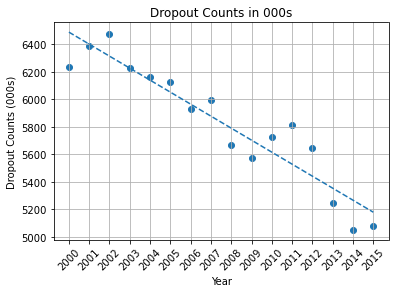

<Figure size 432x288 with 0 Axes>

In [41]:
# Plot the linear model on top of scatter plot 
Year = Trend_df.iloc[:,0]
Count = Trend_df.iloc[:,1]
# Perform a linear regression on year versus violent crime rate
d_slope, d_int, d_r, d_p, d_std_err = stats.linregress(Year, Count)
# Create equation of line to calculate predicted violent crime rate
d_fit = d_slope * Year + d_int
#Create plot
plt.scatter(Year,Count)
plt.plot(Year,d_fit,"--")
plt.title('Dropout Counts in 000s')
plt.grid(True)
plt.xticks(Year, rotation=45)
plt.xlabel('Year')
plt.ylabel('Dropout Counts (000s)')
plt.show()
plt.savefig("Trend.png", format="png")

In [40]:
# Find formula of regression line
print("Let x = Year and Let y = Dropout Counts")
print(f"y = {round(d_slope,2)}x + {round(d_int,0)}")

Let x = Year and Let y = Dropout Counts
y = -87.26x + 181000.0


In [30]:
#Bring in bullying data for 2015
B15_csv = "bully_gcj_15.csv"
# Read with Pandas
B15_df = pd.read_csv(B15_csv)
#Total
B15_df["Total"] = B15_df["Alleged_Sexual_Harassment"] + B15_df["Alleged_Racial_Harassment"] + B15_df["Alleged_Disability_Harassment"] + B15_df["Alleged_Orientation_Harassment"] + B15_df["Alleged_Religion_Harassment"]
B15_df = B15_df[['State','Total']]
B15_df.head()

#Groupby
B15G_df = B15_df.groupby('State')
B15m_df = pd.DataFrame(B15G_df.sum())
B15m_df.head()

,Total
State,
Alabama,1357
Alaska,59
Arizona,2780
Arkansas,1227
California,17620


In [31]:
#Bring in bullying data for 2013
B13_csv = "bully_gcj_13.csv"
# Read with Pandas
B13_df = pd.read_csv(B13_csv)
#Total Columns
B13_df["Total"] = B13_df["Alleged_Sexual_Harassment"] + B13_df["Alleged_Racial_Harassment"] + B13_df["Alleged_Disability_Harassment"] + B13_df["Alleged_Orientation_Harassment"] + B13_df["Alleged_Religion_Harassment"]
B13_df = B13_df[['State','Total']]
B13_df.head()

#Groupby
B13G_df = B13_df.groupby('State')
B13m_df = pd.DataFrame(B13G_df.sum())
B13m_df.head()

,Total
State,
Alabama,1704
Alaska,154
Arizona,2786
Arkansas,1570
California,11144


In [32]:
#Bring in modified counts
BSum_csv = "SumBully.csv"
# Read with Pandas
BSum_df = pd.read_csv(BSum_csv)
BSum_df.head()

,State,2015,2013
0,NaN,NaN,NaN
1,Alabama,1357.0,1704.0
2,Alaska,59.0,154.0
3,Arizona,2780.0,2786.0
4,Arkansas,1227.0,1570.0


In [33]:
#Compare bullying data with dropout data
# Convert a single dictionary containing lists into a dataframe
COMPARE_df = pd.DataFrame(
    {"Year": ["2015", "2013"],
     "Dropouts": [5077000, 5243000],
     "Bullying": [134214, 109049]
     }
)
COMPARE_df

,Year,Dropouts,Bullying
0,2015,5077000,134214
1,2013,5243000,109049
